El yolov8 no necesita clonacion, solo con la instalacion de ultralytics es necesario para que se puedan trabajar todos los modelos

In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


A diferencia del yolov3 y yolov4 que se cargaban manualmente las direcciones, en este caso solo es necesario crear un archivo .yaml, en donde este contiene, el numero de clases, la etiqueta y las direcciones de los archivos.

La estrcutra esperada para los archivos para los entrenamientos es la siguiente:

  dataset

---


    --train
      --images
      --label
    --val
      --images
      --label

In [ ]:
data_yaml = """
train: /content/drive/MyDrive/INVESTIGACIÓN UAM/ESTACIÓN DE MONITOREO/dataset/train
val: /content/drive/MyDrive/INVESTIGACIÓN UAM/ESTACIÓN DE MONITOREO/dataset/val

nc: 1
names: ["0"]
"""

with open('data.yaml', 'w') as f:
    f.write(data_yaml)


**Entrenamiento**
Modelo


---



*   YOLOv8n

  *   Parámetros: ~3.2 millones

  * FPS (GPU): 180+

  * Precisión (mAP@50): ~37–40%

  * Uso recomendado: Dispositivos móviles, prototipos rápidos

* YOLOv8s

  * Parámetros: ~11.2 millones

  * FPS (GPU): 120–150

  * Precisión (mAP@50): ~44–47%

  * Uso recomendado: Buen equilibrio para proyectos personales

* YOLOv8m

  * Parámetros: ~25.9 millones

  * FPS (GPU): 80–100

  * Precisión (mAP@50): ~50–52%

  * Uso recomendado: Proyectos con mayor precisión

* YOLOv8l

  * Parámetros: ~43.7 millones

  * FPS (GPU): 50–70

  * Precisión (mAP@50): ~52–55%

  * Uso recomendado: Aplicaciones industriales con buena GPU

* YOLOv8x

  * Parámetros: ~68.2 millones

  * FPS (GPU): 30–50

  * Precisión (mAP@50): ~55–56%

  * Uso recomendado: Investigación o máxima precisión






In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8m.pt')  # Puedes usar yolov8s.pt, yolov8m.pt, etc.

model.train(
    data='data.yaml',
    epochs=100,
    imgsz=640,
    batch=32,
    name='estacion_monitoreo_yolov8'
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 49.7M/49.7M [00:00<00:00, 247MB/s]


Ultralytics 8.3.133 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=estacion_monitoreo_yolov8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrain

100%|██████████| 755k/755k [00:00<00:00, 14.0MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

 12                  -1  2   1993728  ultralytics.nn.modules.block.C2f             [960, 384, 2]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  2    517632  ultralytics.nn.modules.block.C2f             [576, 192, 2]                 
 16                  -1  1    332160  ultralytics.nn.modules.conv.Conv             [192, 192, 3, 2]              
 17            [-1, 12]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 18                  -1  2   1846272  ultralytics.nn.modules.block.C2f             [576, 384, 2]                 
 19                  -1  1   1327872  ultralytics.nn.modules.conv.Conv             [384, 384, 3, 2]              
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

100%|██████████| 5.35M/5.35M [00:00<00:00, 65.9MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.6±0.1 ms, read: 2.1±0.6 MB/s, size: 510.8 KB)


train: Scanning /content/drive/MyDrive/INVESTIGACIÓN UAM/ESTACIÓN DE MONITOREO/dataset/train/labels... 1221 images, 171 backgrounds, 0 corrupt: 100%|██████████| 1221/1221 [01:07<00:00, 18.19it/s]


train: New cache created: /content/drive/MyDrive/INVESTIGACIÓN UAM/ESTACIÓN DE MONITOREO/dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 9.5±18.2 ms, read: 0.9±0.4 MB/s, size: 497.6 KB)


val: Scanning /content/drive/MyDrive/INVESTIGACIÓN UAM/ESTACIÓN DE MONITOREO/dataset/val/labels... 302 images, 57 backgrounds, 0 corrupt: 100%|██████████| 302/302 [00:07<00:00, 37.84it/s]


val: New cache created: /content/drive/MyDrive/INVESTIGACIÓN UAM/ESTACIÓN DE MONITOREO/dataset/val/labels.cache
Plotting labels to runs/detect/estacion_monitoreo_yolov8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/estacion_monitoreo_yolov8
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      12.3G      1.951      1.276      1.341         51        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

                   all        302       1259      0.233      0.576      0.185       0.07



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      12.4G      1.892      1.085      1.318         33        640: 100%|██████████| 39/39 [00:38<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]

                   all        302       1259     0.0199      0.577     0.0164     0.0065



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      12.1G      1.847      1.031      1.316         35        640: 100%|██████████| 39/39 [00:38<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.82it/s]

                   all        302       1259   0.000993     0.0715    0.00054   0.000143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      12.4G       1.87      1.072      1.337         48        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.69it/s]

                   all        302       1259     0.0787      0.362      0.056     0.0189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      12.2G      1.838      1.002      1.311         40        640: 100%|██████████| 39/39 [00:38<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.80it/s]

                   all        302       1259      0.741      0.645      0.686      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      12.5G      1.829     0.9609       1.33         40        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]

                   all        302       1259       0.76       0.73      0.766      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      12.1G      1.823     0.9538      1.319         22        640: 100%|██████████| 39/39 [00:38<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.72it/s]

                   all        302       1259      0.838      0.764      0.822      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      12.4G      1.786     0.9114      1.295         32        640: 100%|██████████| 39/39 [00:38<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.80it/s]

                   all        302       1259       0.81      0.716      0.801      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      12.2G      1.776     0.9067      1.288         36        640: 100%|██████████| 39/39 [00:38<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]

                   all        302       1259      0.875      0.803      0.884      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      12.4G      1.728     0.8752       1.27         45        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]

                   all        302       1259      0.898       0.82      0.905      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      12.1G      1.722     0.8522       1.28         32        640: 100%|██████████| 39/39 [00:38<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.80it/s]

                   all        302       1259      0.903       0.82      0.902       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      12.4G      1.734     0.8524      1.275         19        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]

                   all        302       1259      0.847      0.797      0.871      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      12.1G      1.693     0.8247      1.247         38        640: 100%|██████████| 39/39 [00:38<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.80it/s]

                   all        302       1259      0.879      0.844      0.905      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      12.5G      1.717     0.8264      1.276         38        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.80it/s]

                   all        302       1259      0.907      0.844      0.909      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      12.2G      1.692     0.8104       1.24         38        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]

                   all        302       1259      0.904      0.842      0.916      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      12.5G      1.654     0.7867      1.235         37        640: 100%|██████████| 39/39 [00:38<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]

                   all        302       1259      0.903      0.854      0.918      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      12.1G      1.657     0.7823      1.251         21        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.81it/s]

                   all        302       1259       0.92      0.871      0.935      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      12.5G      1.656     0.7845      1.232         37        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all        302       1259      0.901      0.864      0.924      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      12.2G      1.648     0.7794      1.244         49        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]

                   all        302       1259      0.903       0.87      0.933       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      12.5G      1.616     0.7548      1.205         49        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.82it/s]

                   all        302       1259      0.908      0.879      0.927      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      12.2G      1.624     0.7646      1.225         63        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]

                   all        302       1259      0.917      0.847      0.924      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      12.5G      1.632     0.7594      1.215         56        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]

                   all        302       1259      0.905      0.876      0.927      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      12.1G      1.633     0.7575      1.231         31        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]

                   all        302       1259       0.92      0.872      0.937      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      12.5G      1.621     0.7412      1.223         16        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]

                   all        302       1259        0.9      0.854      0.913      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      12.1G      1.607     0.7341      1.208         28        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]

                   all        302       1259      0.922      0.878      0.938       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      12.5G       1.62     0.7401      1.213         48        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]

                   all        302       1259      0.924      0.878       0.94      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      12.1G       1.58     0.7239      1.205         37        640: 100%|██████████| 39/39 [00:38<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]

                   all        302       1259      0.928      0.876      0.937      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      12.4G      1.572     0.7138        1.2         30        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.85it/s]

                   all        302       1259      0.924      0.891      0.943      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      12.2G      1.585     0.7185      1.212         38        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]

                   all        302       1259      0.911      0.886      0.935      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      12.5G       1.55     0.7038      1.188         31        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.86it/s]

                   all        302       1259      0.919      0.882      0.938      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      12.1G      1.574     0.7069      1.196         28        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.84it/s]

                   all        302       1259      0.926      0.886      0.937      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      12.5G      1.564     0.7054        1.2         50        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.80it/s]

                   all        302       1259      0.932      0.886      0.938      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      12.1G      1.552     0.6939      1.188         40        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.86it/s]

                   all        302       1259      0.928      0.891      0.945      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      12.5G      1.538     0.6919      1.193         85        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.83it/s]

                   all        302       1259      0.923      0.892       0.94      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      12.1G      1.517     0.6852      1.175         59        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.82it/s]

                   all        302       1259      0.902      0.864      0.928      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      12.4G      1.558      0.699      1.174         45        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.82it/s]

                   all        302       1259      0.943      0.889      0.949      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      12.2G      1.537     0.6792      1.184         42        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]

                   all        302       1259      0.913      0.881      0.933      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      12.5G      1.532     0.6846      1.184         37        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.82it/s]

                   all        302       1259      0.923      0.898      0.946      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      12.2G      1.495     0.6761      1.171         52        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.83it/s]

                   all        302       1259      0.929      0.898      0.948      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      12.4G      1.478     0.6673      1.163         21        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all        302       1259      0.928      0.886      0.944      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      12.1G      1.481     0.6539      1.161         29        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.84it/s]

                   all        302       1259      0.914      0.915      0.952      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      12.5G      1.499     0.6615      1.175         19        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.86it/s]

                   all        302       1259       0.92      0.907      0.949      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      12.1G      1.508     0.6646      1.172         50        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.83it/s]

                   all        302       1259      0.934      0.894       0.95      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      12.4G      1.472     0.6518      1.158         41        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.83it/s]

                   all        302       1259      0.942       0.89      0.949      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      12.2G      1.478      0.648      1.159         41        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.86it/s]

                   all        302       1259      0.936      0.889      0.947      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      12.4G      1.456     0.6452      1.149         22        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.85it/s]

                   all        302       1259      0.931      0.892      0.946      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      12.1G      1.461     0.6494      1.159         38        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.85it/s]

                   all        302       1259      0.919      0.893      0.945      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      12.4G      1.475     0.6542      1.155         41        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.80it/s]

                   all        302       1259      0.943        0.9      0.952       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      12.1G      1.441     0.6407      1.143         33        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.84it/s]

                   all        302       1259      0.945      0.899      0.947      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      12.4G      1.402     0.6214      1.126         20        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.84it/s]

                   all        302       1259      0.935      0.907      0.948      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      12.1G      1.426     0.6263      1.144         41        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.82it/s]

                   all        302       1259      0.928      0.902      0.944      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100        12G      1.418     0.6192       1.13         29        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.86it/s]

                   all        302       1259      0.934      0.902      0.947      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      12.2G      1.429     0.6245      1.147         43        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.88it/s]

                   all        302       1259      0.937      0.899      0.957      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      12.4G      1.403     0.6205       1.14         35        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.80it/s]

                   all        302       1259      0.932      0.899      0.948      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      12.1G      1.388     0.6144      1.125         31        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.88it/s]

                   all        302       1259      0.927       0.89      0.947       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      12.5G      1.382     0.6074      1.117         17        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.87it/s]

                   all        302       1259      0.916      0.905      0.945      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      12.1G      1.388     0.6105      1.122         46        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.88it/s]

                   all        302       1259       0.92        0.9      0.941      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      12.4G      1.373      0.592      1.121         40        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.84it/s]

                   all        302       1259      0.926      0.892      0.945      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      12.1G      1.382     0.6031      1.123         28        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]

                   all        302       1259      0.934      0.895      0.942      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      12.5G      1.363     0.5928      1.093         40        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.85it/s]

                   all        302       1259      0.925      0.899       0.95       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      12.2G      1.362     0.5959      1.117         63        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.89it/s]

                   all        302       1259      0.939      0.901      0.945      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      12.5G      1.348     0.5936      1.114         38        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.84it/s]

                   all        302       1259      0.942      0.897      0.947      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100        12G      1.351     0.5882      1.106         44        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.87it/s]

                   all        302       1259      0.936      0.919      0.952      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      12.4G      1.329     0.5819      1.099         76        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.87it/s]

                   all        302       1259      0.935      0.903      0.948      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      12.1G      1.335     0.5806      1.101         49        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.84it/s]

                   all        302       1259       0.93      0.907      0.946      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      12.4G      1.328      0.583      1.088         45        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.84it/s]

                   all        302       1259      0.938      0.895      0.943      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      12.1G      1.327     0.5792      1.107         42        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.85it/s]

                   all        302       1259      0.937      0.902      0.946      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      12.4G      1.308     0.5733      1.088         34        640: 100%|██████████| 39/39 [00:38<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.85it/s]

                   all        302       1259      0.923      0.909      0.944      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      12.1G      1.289     0.5695      1.082         22        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.83it/s]

                   all        302       1259      0.923      0.901      0.943      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      12.5G      1.301     0.5677      1.088         41        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.85it/s]

                   all        302       1259      0.947      0.896      0.946      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      12.2G      1.285     0.5621      1.071         36        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.86it/s]

                   all        302       1259      0.939       0.89      0.943      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      12.4G      1.285     0.5566      1.084         37        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.83it/s]

                   all        302       1259      0.948      0.898      0.948       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      12.2G      1.276     0.5633      1.087         29        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.85it/s]

                   all        302       1259      0.941      0.898      0.945      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      12.4G      1.265     0.5516      1.077         36        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.89it/s]

                   all        302       1259      0.948      0.904      0.944      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      12.2G      1.273     0.5535      1.079         29        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.87it/s]

                   all        302       1259      0.945      0.903       0.95      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      12.5G      1.267     0.5516      1.072         36        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.85it/s]

                   all        302       1259      0.936      0.902      0.947      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      12.1G      1.251     0.5496      1.059         55        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.89it/s]

                   all        302       1259      0.941      0.904      0.949       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      12.5G      1.238     0.5436      1.059         54        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.88it/s]

                   all        302       1259      0.939      0.905      0.945       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      12.2G      1.226     0.5391      1.053         35        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.89it/s]

                   all        302       1259      0.934      0.898      0.942      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      12.4G      1.211     0.5331       1.05         45        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.92it/s]

                   all        302       1259      0.919      0.918      0.945       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      12.2G      1.218     0.5295      1.059         35        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.83it/s]

                   all        302       1259      0.941      0.901      0.945       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      12.5G      1.215     0.5309      1.052         54        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.91it/s]

                   all        302       1259      0.939        0.9      0.947      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      12.1G      1.195     0.5337      1.048         30        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.90it/s]

                   all        302       1259      0.931      0.894      0.946      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      12.5G      1.197     0.5228      1.042         34        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.88it/s]

                   all        302       1259      0.936      0.898      0.938      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      12.2G      1.184     0.5181      1.044         51        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.90it/s]

                   all        302       1259      0.933      0.902      0.944      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      12.4G      1.172      0.519      1.044         27        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.84it/s]

                   all        302       1259      0.937      0.902      0.946      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      12.2G      1.178     0.5211      1.037         28        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.91it/s]

                   all        302       1259      0.935      0.897      0.942      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      12.4G      1.169     0.5159      1.036         32        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.89it/s]

                   all        302       1259      0.938      0.902      0.942      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      12.1G      1.191     0.5242      1.039         70        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.85it/s]

                   all        302       1259      0.932      0.905      0.943      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      12.5G      1.171     0.5163      1.035         72        640: 100%|██████████| 39/39 [00:38<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.90it/s]

                   all        302       1259      0.924      0.911      0.944      0.483


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      12.1G      1.175     0.5023      1.064         22        640: 100%|██████████| 39/39 [00:39<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.80it/s]

                   all        302       1259      0.937      0.898      0.943      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      12.4G      1.175     0.5012      1.054         30        640: 100%|██████████| 39/39 [00:37<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.90it/s]

                   all        302       1259      0.911      0.907      0.942      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      12.1G      1.136     0.4857      1.041         31        640: 100%|██████████| 39/39 [00:37<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.91it/s]

                   all        302       1259      0.933      0.902      0.942      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      12.5G      1.141     0.4856      1.057         33        640: 100%|██████████| 39/39 [00:37<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.83it/s]

                   all        302       1259      0.932      0.906      0.944      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      12.1G      1.123     0.4823      1.044         19        640: 100%|██████████| 39/39 [00:37<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.89it/s]

                   all        302       1259      0.926      0.902      0.942      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      12.5G      1.114     0.4799      1.036         26        640: 100%|██████████| 39/39 [00:37<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.85it/s]

                   all        302       1259      0.942      0.896      0.944      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      12.1G      1.123     0.4792      1.031         28        640: 100%|██████████| 39/39 [00:37<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.83it/s]

                   all        302       1259      0.928      0.901      0.943      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      12.5G      1.118     0.4724      1.045         14        640: 100%|██████████| 39/39 [00:37<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.89it/s]

                   all        302       1259      0.929      0.898      0.939      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      12.1G      1.109     0.4721      1.029         33        640: 100%|██████████| 39/39 [00:37<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.86it/s]

                   all        302       1259      0.936      0.898      0.941      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      12.5G      1.097     0.4894      1.024          3        640: 100%|██████████| 39/39 [00:37<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.86it/s]

                   all        302       1259      0.937      0.899      0.941      0.485



100 epochs completed in 1.171 hours.
Optimizer stripped from runs/detect/estacion_monitoreo_yolov8/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/estacion_monitoreo_yolov8/weights/best.pt, 52.0MB

Validating runs/detect/estacion_monitoreo_yolov8/weights/best.pt...
Ultralytics 8.3.133 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


                   all        302       1259       0.93      0.906      0.946      0.491
Speed: 0.1ms preprocess, 5.4ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/estacion_monitoreo_yolov8


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b5274520510>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
from google.colab import files
files.download('/content/runs/detect/estacion_monitoreo_yolov8/weights/last.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from ultralytics import YOLO

model = YOLO('/content/runs/detect/estacion_monitoreo_yolov8/weights/best.pt')  # Ajusta si es necesario

img_path = '/content/video_38_frame_0003.jpg'
results = model(img_path, save=True)  # <- Importante: save=True


image 1/1 /content/video_38_frame_0003.jpg: 384x640 8 0s, 26.0ms
Speed: 2.7ms preprocess, 26.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


In [ ]:
pred_img_path = results[0].save_dir + '/' + img_path.split('/')[-1]
print("Imagen guardada en:", pred_img_path)


Imagen guardada en: runs/detect/predict/video_38_frame_0003.jpg


In [ ]:
import cv2
import matplotlib.pyplot as plt

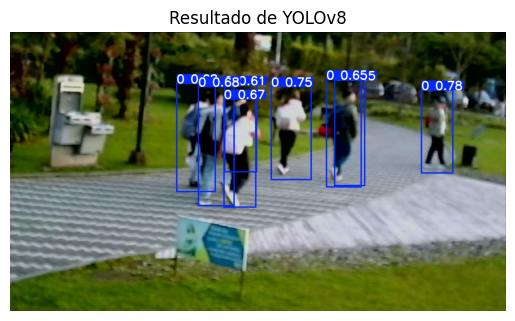

In [ ]:
pred_img = cv2.imread(pred_img_path)
pred_img = cv2.cvtColor(pred_img, cv2.COLOR_BGR2RGB)

# Mostrar la imagen
plt.imshow(pred_img)
plt.axis('off')
plt.title("Resultado de YOLOv8")
plt.show()

In [ ]:

model = YOLO('/content/runs/detect/estacion_monitoreo_yolov8/weights/best.pt')  # Ajusta si es necesario

img_path = '/content/VÃ­deo_9_frame_0008.jpg'
results = model(img_path, save=True)


image 1/1 /content/VÃ­deo_9_frame_0008.jpg: 384x640 17 0s, 26.1ms
Speed: 2.2ms preprocess, 26.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2


In [ ]:
pred_img_path = results[0].save_dir + '/' + img_path.split('/')[-1]
print("Imagen guardada en:", pred_img_path)

Imagen guardada en: runs/detect/predict2/VÃ­deo_9_frame_0008.jpg


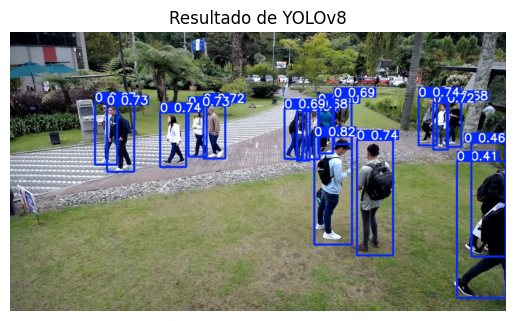

In [ ]:
pred_img = cv2.imread(pred_img_path)
pred_img = cv2.cvtColor(pred_img, cv2.COLOR_BGR2RGB)

# Mostrar la imagen
plt.imshow(pred_img)
plt.axis('off')
plt.title("Resultado de YOLOv8")
plt.show()